In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.__version__

'2.1.3'

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
print(X.head())  # View first 5 rows of features
print(pd.Series(y).value_counts())  # Class distribution

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    50
1    50
2    50
Name: count, dtype: int64


In [4]:
print(X.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 120, Test samples: 30


In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 100.00%


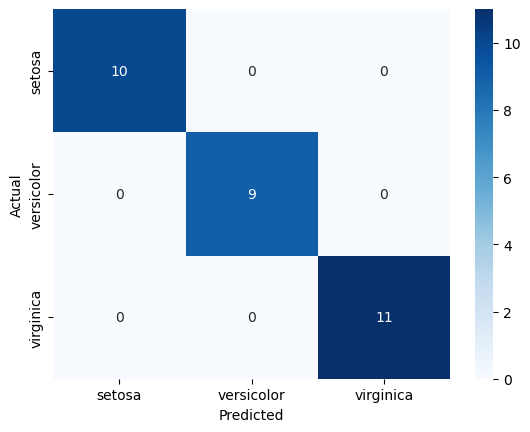

In [7]:
preds = model.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
train_preds = model.predict(X_train); print(accuracy_score(y_train, train_preds))

1.0


In [9]:
importances = model.feature_importances_; print(dict(zip(iris.feature_names, importances)))

{'sepal length (cm)': np.float64(0.10809762464246378), 'sepal width (cm)': np.float64(0.030386812473242528), 'petal length (cm)': np.float64(0.43999397414456937), 'petal width (cm)': np.float64(0.4215215887397244)}
